In [1]:
import numpy as np
import numpy.random as random
import math
number_of_targets =5
time_samples = 100
radarPositions = []
radarPositions.append([50,50])
radarPositions.append([250,200])
radarPositions.append([80,20])
number_of_radars = len(radarPositions)
x_true = np.zeros((time_samples,number_of_targets))
y_true = np.zeros((time_samples,number_of_targets))
x_report = np.zeros((time_samples,number_of_targets,number_of_radars))
y_report = np.zeros((time_samples,number_of_targets,number_of_radars))
speed = np.zeros(number_of_targets)
course = np.zeros(number_of_targets)

for targetIndex in range (0,number_of_targets):
    #khởi tại giá trị tại mốc 0 thời gian
    x_true[0][targetIndex]= random.random()*10+100 #giá trị phân bố đều từ 100 đến 110km
    y_true[0][targetIndex]= random.random()*10+100 #giá trị phân bố đều từ 100 đến 110km
    speed[targetIndex] = 0.05+random.random()*0.1#speed from 18 to 54km/h
    course[targetIndex] = random.random()*3.1415926535*2# từ 0 đến 2pi
    #cập nhật tọa độ thực của mục tiêu dựa trên tốc đọ và hướng di chuyển
    for timeIndex in range(1,time_samples):
        
        dx = speed[targetIndex]*math.sin(course[targetIndex])  
        dy = speed[targetIndex]*math.cos(course[targetIndex]) 
        x_true[timeIndex][targetIndex] = dx + x_true[timeIndex-1][targetIndex]
        y_true[timeIndex][targetIndex] = dy + y_true[timeIndex-1][targetIndex]
    #cập nhật tọa độ đo được của mục tiêu dựa trên tọa độ cự ly phương vị từ các đài và sai số đo 
    for timeIndex in range(0,time_samples):
        for radarIndex in range(0,number_of_radars):
            dx = x_true[timeIndex][targetIndex]-radarPositions[radarIndex][0]
            dy = y_true[timeIndex][targetIndex]-radarPositions[radarIndex][1]
            r_target = math.sqrt(dx*dx+dy*dy) + np.random.normal(0, 0.01, 1)[0]#sai số đo cự ly sigma = 0.01km
            azi_target = math.atan(dx/dy) + np.random.normal(0, 0.5/57.3, 1)[0]#sai số đo phương vị sigma = 0.5 độ
            if (dy<0):
                azi_target = azi_target+3.1415926535
            x_report[timeIndex][targetIndex][radarIndex] = radarPositions[radarIndex][0]+r_target*math.sin(azi_target)
            y_report[timeIndex][targetIndex][radarIndex] = radarPositions[radarIndex][1]+r_target*math.cos(azi_target)
            
        
    

In [2]:
speed

array([0.06762781, 0.05104508, 0.08709602, 0.09261497, 0.13451247])

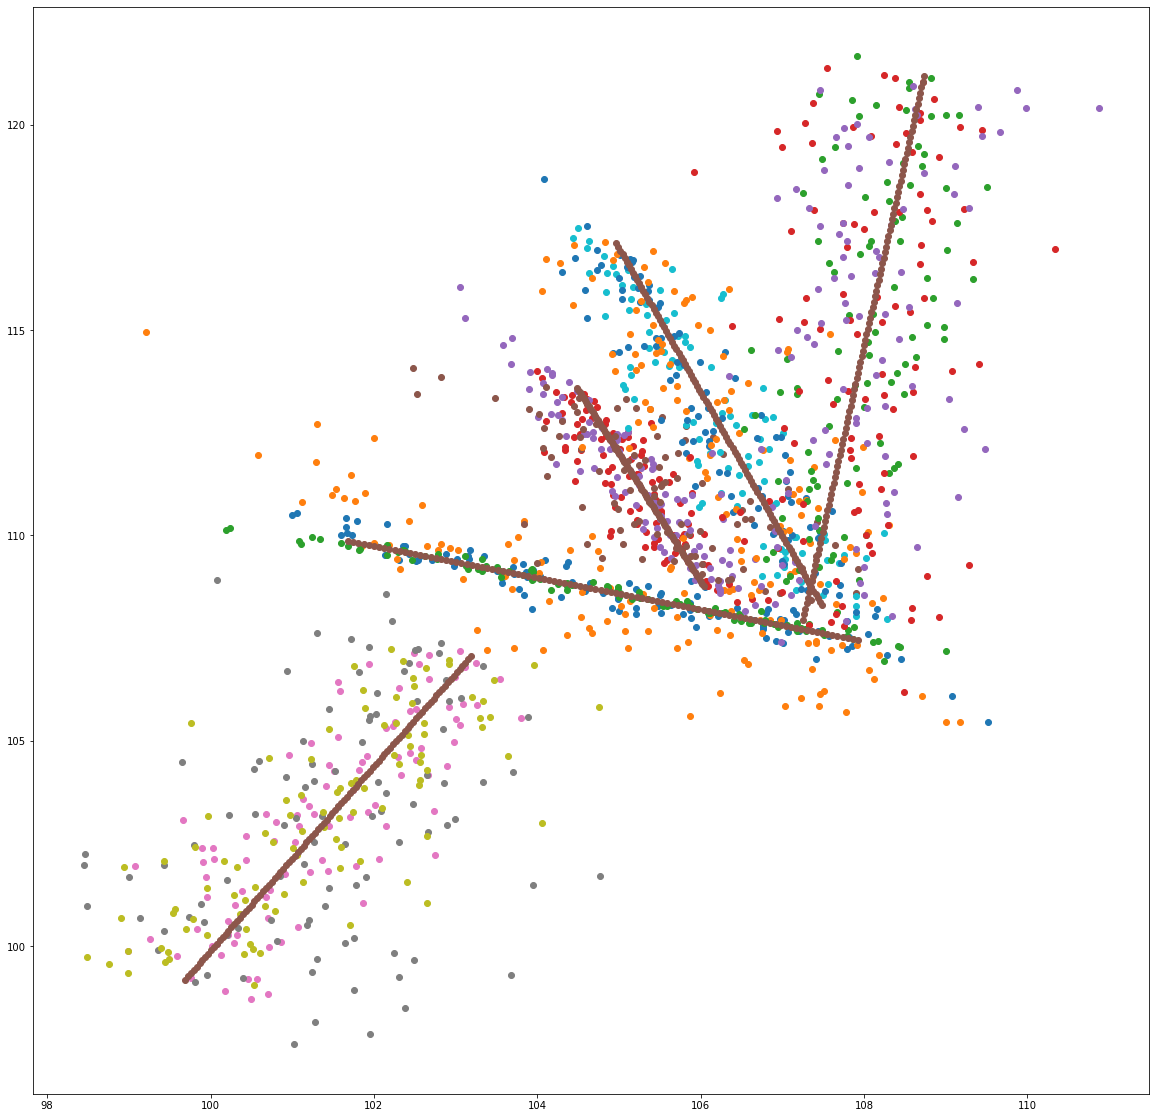

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
#vẽ quỹ đạo 1 mục tiêu trên các đài khác nhau
figure(figsize=(20,20))
for targetIndex in range(0,number_of_targets):
    for radarIndex in range(0,number_of_radars):
        plt.scatter(x_report[:, targetIndex,radarIndex], y_report[:, targetIndex,radarIndex])
# for targetIndex in range(0,number_of_targets):
plt.scatter(x_true[:, :], y_true[:, :])
plt.show()

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from copy import deepcopy
#vẽ quỹ đạo tại 1 thời điểm t=0
timeIndex = 1
data = np.zeros((number_of_targets*number_of_radars,2))
for targetIndex in range(0,number_of_targets):
    for radarIndex in range(0,number_of_radars):
        data[targetIndex*number_of_radars+radarIndex,0] = x_report[timeIndex,targetIndex,radarIndex]
        data[targetIndex*number_of_radars+radarIndex,1] = y_report[timeIndex,targetIndex,radarIndex]
#         plt.scatter(x_report[timeIndex, targetIndex,radarIndex], y_report[timeIndex, targetIndex,radarIndex])
# for targetIndex in range(0,number_of_targets):
#     plt.scatter(x_true[timeIndex, :], y_true[timeIndex, :])






NameError: name 'k' is not defined

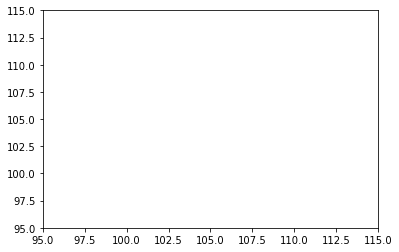

In [98]:
#kmean clustering
import math
axes = plt.gca()
axes.set_xlim([95,115])
axes.set_ylim([95,115])
clusters=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
for i in range(0,1):
    clusterData = data[clusters == i]
    plt.scatter(clusterData[:,0], clusterData[:,1], s=7)
plt.show()

In [97]:
clusterData

array([], shape=(0, 15, 2), dtype=float64)

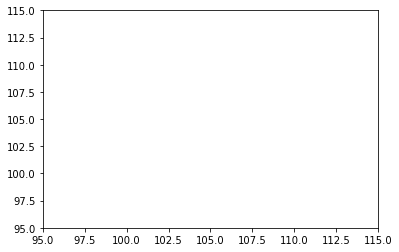

number of classes: 1
Iterations: 3


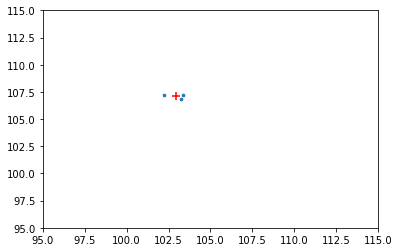

number of classes: 2
Iterations: 3


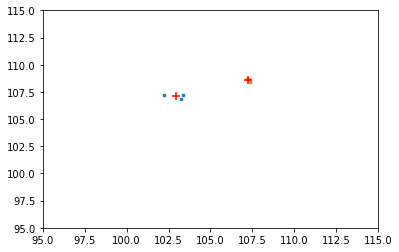

number of classes: 3
Iterations: 3


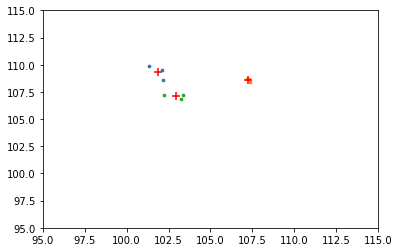

number of classes: 4
Iterations: 3


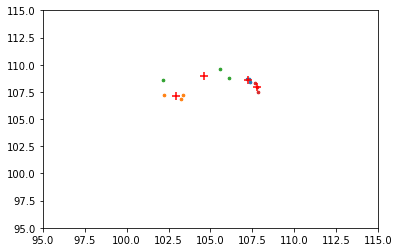

number of classes: 5
Iterations: 2


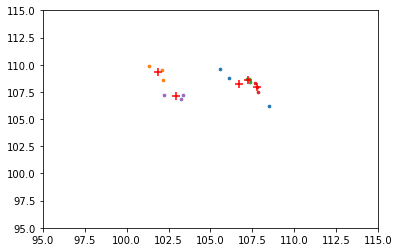

number of classes: 6
Iterations: 3


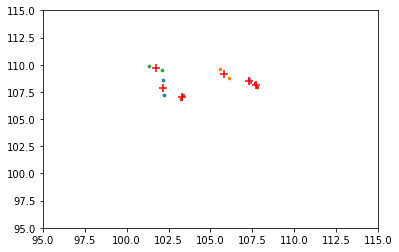

number of classes: 7
Iterations: 3


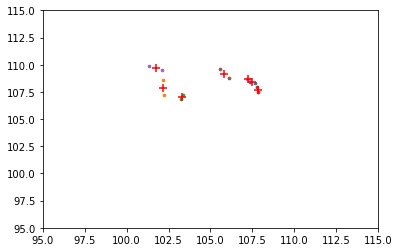

number of classes: 8
Iterations: 2


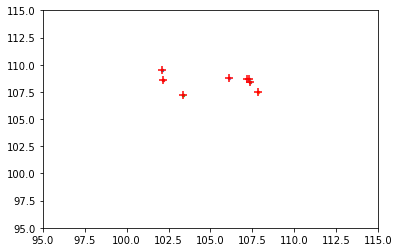

In [92]:
#kmean clustering
import math
axes = plt.gca()
axes.set_xlim([95,115])
axes.set_ylim([95,115])
clusters=[0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4]
for i in range(0,5):
    clusterData = data[clusters == i]
    plt.scatter(clusterData[:,0], data[:,1], s=7)
plt.show()
max_distance = 100
# Number of clusters
for k in range(1,9): #number_of_targets
    print("number of classes:",k)
    n = data.shape[0]
    # Number of features in the data
    c = data.shape[1]
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(k,2)*std + mean
    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = deepcopy(centers) # Store new centers
    clusters = np.zeros(n)
    distances = np.zeros((n,k))
    max_samples_per_cluster = number_of_radars
    error = 1
    numIter = 0
    max_plot_perTarget = math.floor(n/k)
    if(max_plot_perTarget<1):
        max_plot_perTarget=1
    if(max_plot_perTarget>number_of_radars):
        max_plot_perTarget=number_of_radars    
    while error>0:
        numIter+=1
        
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(data - centers_new[i], axis=1)
            #eanDistances = np.mean(distances[:,i])
            #tances[:,i] = distances[:,i] /meanDistances
        sortedDistance = np.zeros((n,k))
        clusterMap = np.zeros((n,k))
        clusters = np.zeros(n)-np.ones(n)
        switches=1
        while switches>0:
            switches=0
            for i in range(k):
                sortedDistance[:,i] = np.sort (distances[:,i])
                for j in range(n):
                    clusterMap[j,i] = 1 if distances[j,i] <= sortedDistance [max_plot_perTarget-1,i] else 0
    #         print("clusterMap before:",clusterMap)
            for j in range(n):
                for i in range(k):
                    if(clusterMap[j,i]>0):
                        for i_ in range(k):
                            if (clusterMap[j,i_]>0)&(i!=i_):
                                if(distances[j,i]>distances[j,i_]):
                                    clusterMap[j,i] = 0
                                    distances[j,i] = 100
                                    switches+=1
#             print("switches:",switches)
    #     clusters = np.argmax(clusterMap, axis = 1) 
        clusters = np.zeros(n)-np.ones(n)
        for i in range(k):
            for j in range(n):
                if clusterMap[j,i]==1:
    #                 if distances[j,i]<max_distance:
                    clusters[j] = i
        centers_old = deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            clusterData = data[clusters == i]
            centers_new[i] = np.mean(data[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old) 
    print("Iterations:",numIter)
    #lọc nhiễu dựa trên max_distance
    for j in range(n):
        if(clusters[j]>=0):
            if(distances[j,math.floor(clusters[j])]>max_distance):
                clusters[j]=-1
    #tính lại centers
    for i in range(k):
            centers_new[i] = np.mean(data[clusters == i], axis=0)
    # Plot the data and the centers generated as random
    for i in range(k):
        clusterData = data[clusters == i]
        plt.scatter(clusterData[:,0], clusterData[:,1], s=7)
        plt.scatter(centers_new[i,0], centers_new[i,1], c='r',marker='+', s=50)
    axes = plt.gca()
    axes.set_xlim([95,115])
    axes.set_ylim([95,115])
    plt.show()
    #loc nhieu

In [48]:
for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
        
sortedDistance = np.zeros((n,k))
clusterMap = np.zeros((n,k))
clusters = np.zeros(n)-np.ones(n)
switches=1
while switches>0:
    switches=0
    for i in range(k):
        sortedDistance[:,i] = np.sort (distances[:,i])
        for j in range(n):
            clusterMap[j,i] = 1 if distances[j,i] < sortedDistance [max_plot_perTarget,i] else 0
#         print("clusterMap before:",clusterMap)
    for j in range(n):
        for i in range(k):
            if(clusterMap[j,i]>0):
                for i_ in range(k):
                    if (clusterMap[j,i_]>0)&(i!=i_):
                        if(distances[j,i]>distances[j,i_]):
                            clusterMap[j,i] = 0
                            distances[j,i] = max_distance
                            switches+=1
    print("switches:",switches)
clusters = np.zeros(n)-np.ones(n)
for i in range(k):
    for j in range(n):
        if clusterMap[j,i]==1:
            if distances[j,i]<max_distance:
                clusters[j] = i
centers_old = deepcopy(centers_new)
# Calculate mean for every cluster and update the center
for i in range(k):
    clusterData = data[clusters == i]
    centers_new[i] = np.mean(data[clusters == i], axis=0)
error = np.linalg.norm(centers_new - centers_old)  

switches: 7
switches: 6
switches: 6
switches: 3
switches: 1
switches: 0


In [60]:
clusterData

array([[107.35025642, 108.42232199],
       [107.16498283, 108.6655908 ],
       [107.29840259, 108.66058896]])

In [45]:
clusterMap

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [ ]:
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)
plt.scatter(x_report[timeIndex, :,:], y_report[timeIndex, :,:])
plt.show()